**Question 1: What is Anomaly Detection? Explain its types (point, contextual, and
collective anomalies) with examples.**


**Answer -** Anomaly Detection is a machine learning technique used to identify unusual patterns or data points that deviate significantly from the majority of the data. These unusual instances are called anomalies or outliers.

It is commonly used in fraud detection, network security, system monitoring, and fault detection.

Types of Anomalies:

 - Point Anomalies:

A single data point is far different from the rest.

Example: In a credit card dataset, a transaction of ₹10,00,000 when all others are below ₹10,000 is a point anomaly.

 - Contextual Anomalies:

The data point is only abnormal in a specific context (like time or location).

Example: A temperature of 30°C is normal in summer but anomalous in winter.

 - Collective Anomalies:

A group of data points together form an abnormal pattern, even if individual points look normal.

Example: A sudden spike in network traffic over 5 minutes could indicate a DDoS attack, even though each second’s data alone looks fine.

**Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of
their approach and suitable use cases.**

**Answer -** Isolation Forest, DBSCAN, and Local Outlier Factor (LOF) are popular algorithms for anomaly detection, but they differ in approach and use cases.

**1. Isolation Forest**

Approach:
It isolates anomalies instead of profiling normal points. The algorithm randomly splits data using decision trees; anomalies are easier to isolate and require fewer splits.

Use Case:
Works well for high-dimensional data (like credit card fraud detection or server logs).

Key Point:
Fast, scalable, and effective for large datasets.

**2. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

Approach:
Groups data into dense regions; points that don’t belong to any cluster are considered anomalies.

Use Case:
Good for spatial or geometric data where cluster shapes are irregular (like GPS data or sensor readings).

Key Point:
Detects noise naturally but struggles with varying densities.

**3. Local Outlier Factor (LOF)**

Approach:
Measures the local density around each point; points with much lower density than their neighbors are anomalies.

Use Case:
Best when data has clusters with different densities.

Key Point:
Focuses on local anomalies rather than global outliers.

**Question 3: What are the key components of a Time Series? Explain each with one
example**

**Answer -** Time Series is a sequence of data points recorded over time. Its key components are:

**1. Trend (T)**

Definition: The long-term increase or decrease in the data over time.

Example: The steady rise in electricity consumption over years due to population growth.

**2. Seasonality (S)**

Definition: Regular, repeating patterns within fixed periods (daily, weekly, monthly, yearly).

Example: Ice cream sales peak every summer and drop in winter every year.

**3. Cyclic Component (C)**

Definition: Fluctuations that occur over irregular, longer periods due to economic or business cycles.

Example: Stock market indices rising and falling with economic booms and recessions.

**4. Irregular/Residual Component (I)**

Definition: Random, unpredictable variations or noise in the data.

Example: A sudden power outage causing a spike or drop in electricity consumption.

**Question 4: Define Stationary in time series. How can you test and transform a
non-stationary series into a stationary one?**

**Answer -** A stationary time series has constant statistical properties over time — the mean, variance, and autocorrelation do not change.

Example: Daily temperature anomalies with constant mean and variance.

**Why it matters:**
Most time series forecasting models (like ARIMA) assume stationarity. Non-stationary data can lead to unreliable predictions.

**1. Testing for Stationarity:**

Visual Inspection: Plot the series and check for trends or changing variance.

Statistical Tests:

Augmented Dickey-Fuller (ADF) Test → null hypothesis: series is non-stationary.

KPSS Test → null hypothesis: series is stationary.

**2. Transforming a Non-Stationary Series:**

Differencing: Subtract the previous value from the current value to remove trends.

y_t_diff = y_t - y_{t-1}

Log Transformation: Stabilizes variance.

Detrending: Fit a trend line and subtract it from the series.

Seasonal Differencing: Subtract value from the same season in previous cycle to remove seasonality.

**Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
terms of structure and application.**

**Answer** AR, MA, ARIMA, SARIMA, and SARIMAX are time series forecasting models with different structures and use cases:

**AR (Autoregressive)**
 - Depends on past values
 - Uses lagged observations to predict current value
 - Short-term forecasting when series is stationary

**MA (Moving Average)**
 - Depends on past errors
 - Uses past shocks or residuals to model series
 - Series where random noise patterns affect future values

**ARIMA (Autoregressive Integrated Moving Average)**
 - Combines AR + MA + differencing (integration) to handle non-stationarity
 - Models trend and noise together;
d = number of differences
 - Widely used for stationary and non-stationary series without seasonality

**SARIMA (Seasonal ARIMA)**
 - ARIMA + seasonal terms (P,D,Q,m)
 - Captures seasonal patterns in addition to trend and noise
 - Series with seasonal effects, e.g., monthly sales, electricity demand

**SARIMAX (Seasonal ARIMA with Exogenous Variables)**
 - SARIMA + external regressors (X)
 - Includes external factors to improve forecasting
 - Series influenced by external variables, e.g., sales affected by marketing spend or holidays  



**Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series,
and decompose it into trend, seasonality, and residual components.**


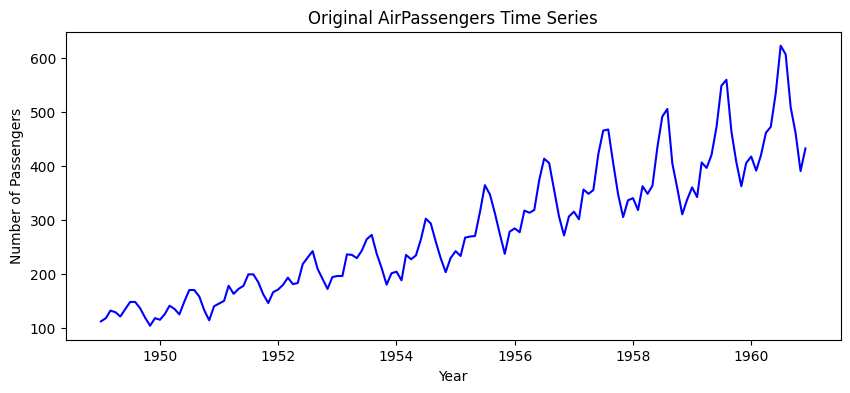

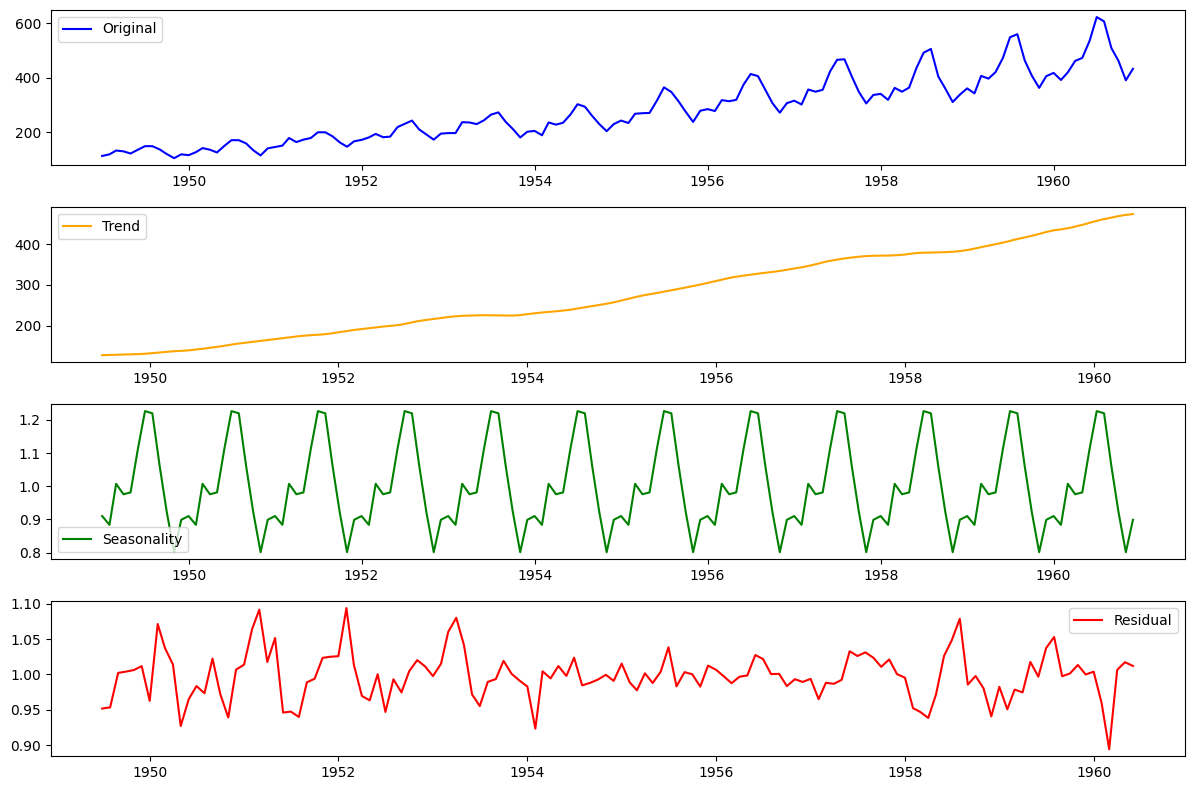

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

# Load AirPassengers dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
ts = data['Passengers']

# Plot original time series
plt.figure(figsize=(10, 4))
plt.plot(ts, color='blue')
plt.title("Original AirPassengers Time Series")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.show()

# Decompose the time series
decomposition = seasonal_decompose(ts, model='multiplicative')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(ts, label='Original', color='blue')
plt.legend(loc='best')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend', color='orange')
plt.legend(loc='best')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend(loc='best')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual', color='red')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


**Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to
detect anomalies. Visualize the anomalies on a 2D scatter plot.**

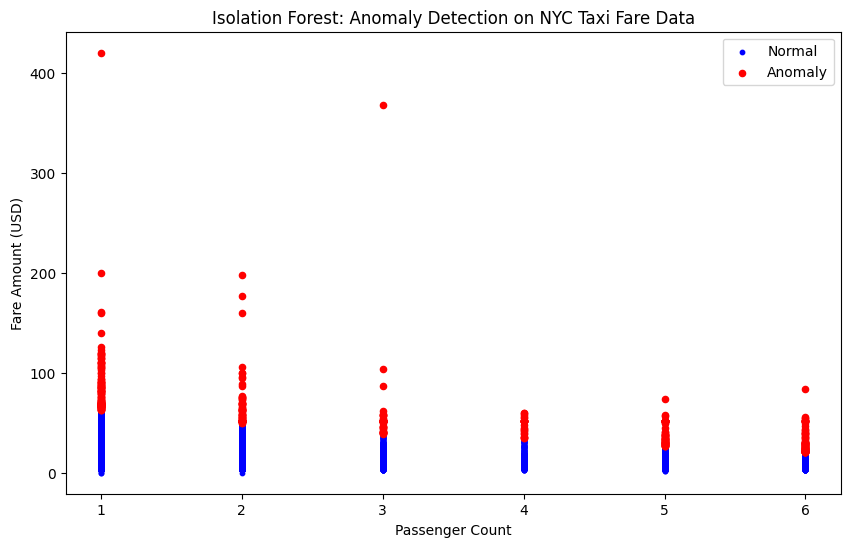

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Step 1: Download & load the data
url = "https://github.com/DataTalksClub/nyc-tlc-data/releases/download/yellow/yellow_tripdata_2021-01.csv.gz"
df = pd.read_csv(url, compression='gzip', usecols=["passenger_count", "fare_amount"])
# Keep only two columns for simplicity
df = df.dropna(subset=["passenger_count", "fare_amount"])

# Step 2: Basic cleaning
# Remove impossible values
df = df[(df["passenger_count"] > 0) & (df["fare_amount"] > 0)]
# Optionally sample to reduce size
df = df.sample(n=50000, random_state=42)

# Step 3: Apply Isolation Forest
iso = IsolationForest(contamination=0.01, random_state=42)
df["anomaly"] = iso.fit_predict(df[["passenger_count", "fare_amount"]])

# Step 4: Separate normal vs anomalies
normal = df[df["anomaly"] == 1]
anomalies = df[df["anomaly"] == -1]

# Step 5: Plot results
plt.figure(figsize=(10, 6))
plt.scatter(normal["passenger_count"], normal["fare_amount"], c='blue', s=10, label='Normal')
plt.scatter(anomalies["passenger_count"], anomalies["fare_amount"], c='red', s=20, label='Anomaly')
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount (USD)")
plt.title("Isolation Forest: Anomaly Detection on NYC Taxi Fare Data")
plt.legend()
plt.show()


**Question 8: Train a SARIMA model on the monthly airline passengers dataset.
Forecast the next 12 months and visualize the results.**

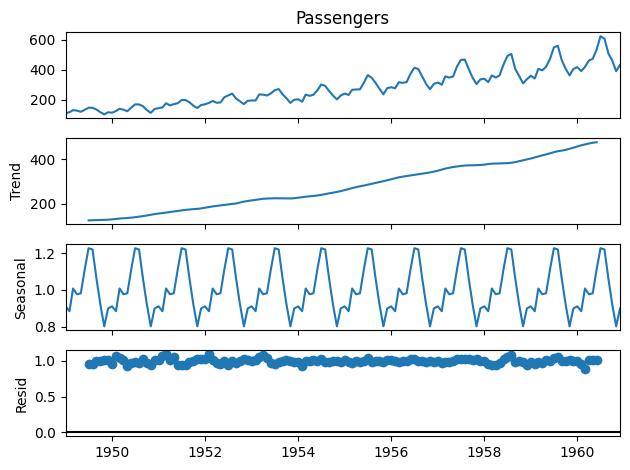

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


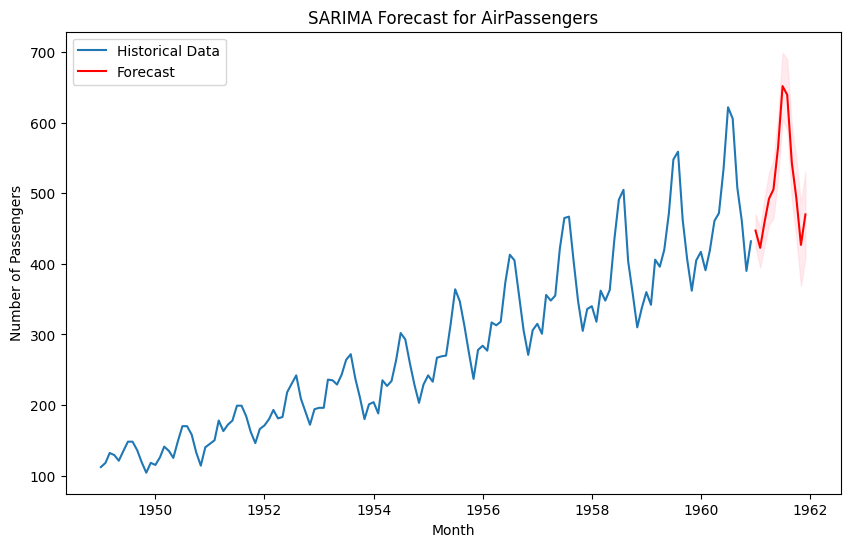

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 1: Load the AirPassengers dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
ts = data['Passengers']

# Step 2: Optional decomposition (for understanding)
decomposition = seasonal_decompose(ts, model='multiplicative')
decomposition.plot()
plt.show()

# Step 3: Train SARIMA model
# Seasonal ARIMA parameters (p,d,q)x(P,D,Q,m)
# Using (1,1,1)x(1,1,1,12) as a common starting point for monthly data
model = SARIMAX(ts, order=(1,1,1), seasonal_order=(1,1,1,12), enforce_stationarity=False, enforce_invertibility=False)
sarima_model = model.fit(disp=False)

# Step 4: Forecast next 12 months
forecast = sarima_model.get_forecast(steps=12)
forecast_index = pd.date_range(start=ts.index[-1] + pd.offsets.MonthBegin(1), periods=12, freq='MS')
forecast_series = pd.Series(forecast.predicted_mean.values, index=forecast_index)
conf_int = forecast.conf_int()

# Step 5: Plot original series + forecast
plt.figure(figsize=(10,6))
plt.plot(ts, label='Historical Data')
plt.plot(forecast_series, label='Forecast', color='red')
plt.fill_between(forecast_index, conf_int.iloc[:,0], conf_int.iloc[:,1], color='pink', alpha=0.3)
plt.title("SARIMA Forecast for AirPassengers")
plt.xlabel("Month")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()


**Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect
anomalies and visualize them using matplotlib.**


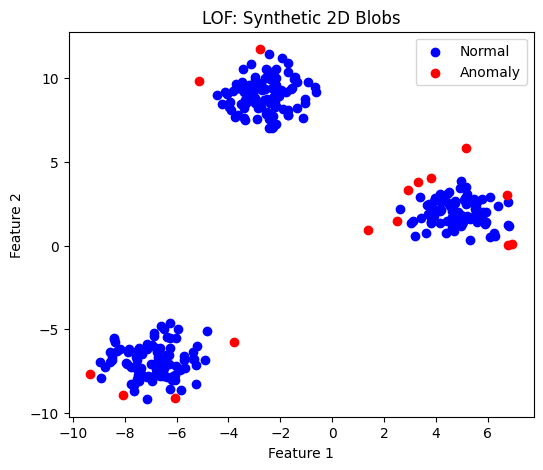

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import LocalOutlierFactor

# ---------------------------
# Dataset 1: Synthetic Blobs
# ---------------------------
X_blobs, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Apply LOF
lof_blobs = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_blobs = lof_blobs.fit_predict(X_blobs)

# Separate normal vs anomalies
normal_blobs = X_blobs[y_blobs == 1]
anomalies_blobs = X_blobs[y_blobs == -1]

# Plot
plt.figure(figsize=(6,5))
plt.scatter(normal_blobs[:,0], normal_blobs[:,1], c='blue', label='Normal')
plt.scatter(anomalies_blobs[:,0], anomalies_blobs[:,1], c='red', label='Anomaly')
plt.title("LOF: Synthetic 2D Blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

**Question 10: You are working as a data scientist for a power grid monitoring company.
Your goal is to forecast energy demand and also detect abnormal spikes or drops in
real-time consumption data collected every 15 minutes. The dataset includes features
like timestamp, region, weather conditions, and energy usage.
Explain your real-time data science workflow:
● How would you detect anomalies in this streaming data (Isolation Forest / LOF /
DBSCAN)?
● Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?
● How would you validate and monitor the performance over time?
● How would this solution help business decisions or operations?**


**Answer -**
**1. Anomaly Detection in Streaming Data**

Use online or incremental anomaly detection methods to detect abnormal spikes or drops in energy usage.

Isolation Forest: Efficient for high-dimensional features like region, weather, and energy usage; isolates anomalies quickly.

Local Outlier Factor (LOF): Detects local density anomalies; useful if spikes are abnormal relative to nearby time points.

DBSCAN: Could detect clusters of unusual consumption but less suitable for streaming because it requires the full dataset.

Workflow:

Collect 15-minutely consumption data along with features.

Apply Isolation Forest/LOF in near real-time on a rolling window.

Flag anomalies for alerting or operational review.

**2. Short-Term Forecasting**

SARIMAX is preferred because:

Energy demand exhibits trend, seasonality (daily, weekly), and weather-related effects.

Exogenous variables (temperature, humidity, holidays) can be included.

ARIMA/SARIMA alone might ignore weather impacts, reducing accuracy.

Workflow:

Preprocess time series (resample to 15-min intervals, handle missing data).

Train SARIMAX model using past demand + weather variables.

Forecast short-term demand (next 1–6 hours) for grid management.

**3. Validation & Performance Monitoring**

Validation: Use rolling-window cross-validation to simulate real-time predictions.

Metrics: Mean Absolute Error (MAE), Root Mean Squared Error (RMSE) for forecasting; precision/recall for anomaly detection.

Monitoring:

Continuously compare predictions to actual consumption.

Retrain models periodically when forecast errors increase or consumption patterns change (concept drift).

Track anomaly alerts to reduce false positives.

**4. Business & Operational Impact**

Energy Supply Planning: Adjust power generation or storage based on forecasted demand.

Preventive Actions: Detect unusual spikes (equipment malfunction, sudden load) in real-time and prevent outages.

Cost Efficiency: Reduce wasted energy and overproduction.

Decision Support: Prioritize regions or units for inspection based on detected anomalies.